# Milestone 1 Phase 2

#### Introduction

- Nama : Yasmine Toshka
- Batch: 03

#### Data Set Information:
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

#### Objective
Telco Customer Churn Prediction using Artificial Neural Network (Sequential & Functional API)

### IMPORT LIBRARY

In [55]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np

np.random.seed(42)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns

### DATA LOADING

In [4]:
# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
# Look at the first 5 rows the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### DATA CLEANING 

In [9]:
# Showing info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Kita bisa liat dari informasi data diatas bahwa untuk kolom (*Total Charges*) harusnya berisi numerik tetapi tipe datanya disebutkan sebagai object. Maka kita akan melihat unik dari kolom tersebut

In [10]:
# Melihat value dari Total Charges
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
df[df.TotalCharges == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Terdapat 11 baris yang terdapat missing pada dataset, maka kita akan mendrop karena dianggap customer baru yang belum bisa kita prediksi.

In [13]:
# Drop ' ' from TotalCharges
df['TotalCharges'].replace(to_replace = ' ', value= np.nan, inplace = True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')
df.dropna(axis=0, inplace=True)

Selanjutnya kita akan mendrop juga customerID karena terlalu banyak *unique* yang tidak diperlukan.

In [ ]:
# Drop CustomerID
data.drop(['customerID'], axis=1, inplace=True)

Kita juga akan mengecek *Missing Value* dan *Duplicated Data*

In [7]:
# Missing Value
print('Missing value :','\n', df.isnull().sum())
print("-----------------------------------------")
# Duplicated Data
print('Duplicated data : ', df.duplicated().sum())

Missing value : 
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
-----------------------------------------
Duplicated data :  0


Ternyata tidak adanya missing value maupun data yang duplikat. Maka kita akan melanjutkan ke EDA

### EXPLORATORY DATA ANALYSIS (EDA)
### 1. Churn

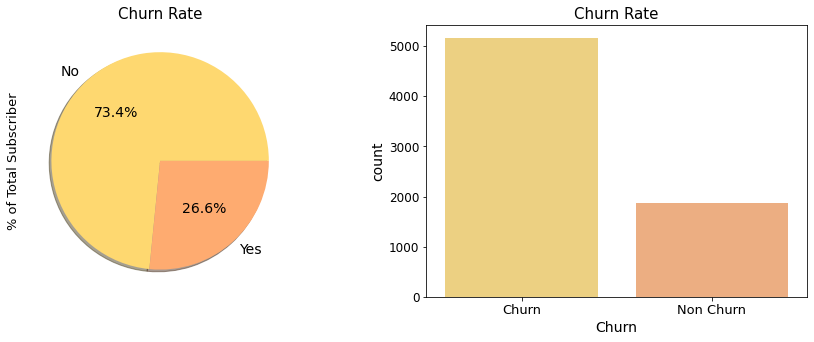

In [33]:
import warnings
warnings.filterwarnings('ignore')

f, ax = plt.subplots(1,2,figsize=(15,5))
colors = ["#fed870","#feab70"]
labels = df['Churn'].unique()


df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True, colors=colors, labels=labels, fontsize=14)
ax[0].set_title('Churn Rate', fontsize=15)
ax[0].set_ylabel('% of Total Subscriber', fontsize=13)

sns.countplot(df['Churn'], ax=ax[1], palette=colors)
ax[1].set_title('Churn Rate', fontsize= 15)
ax[1].set_xticklabels(['Churn','Non Churn'], fontsize=13)

plt.show()

Dari seluruh pelanggan yang tercatat di dataset, sekitar 26% di antaranya berhenti menggunakan layanan (churn).

### 2. Gender

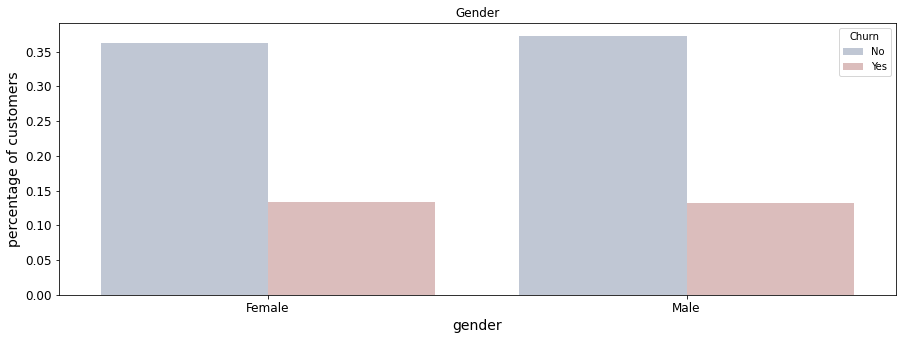

In [30]:
# Gender vs Churn
axis_y = "percentage of customers"
df_1 = df.groupby('gender')["Churn"].value_counts()/len(df)
df_1 = df_1.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()

# Graph
plt.figure(figsize=(15,5))
plt.title("Gender")
sns.barplot(data=df_1, x='gender', y=axis_y, hue='Churn', palette = 'vlag')
plt.show()

Untuk jenis kelamin keduanya memiliki tingkat churn yang sama.

### 3. Senior Citizen

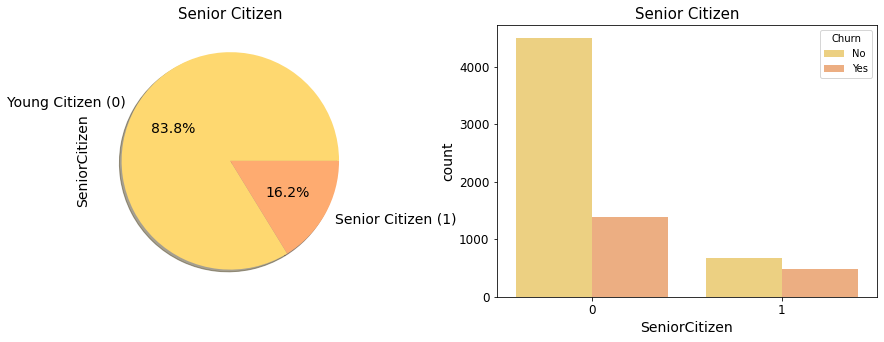

In [36]:
f, ax = plt.subplots(1,2,figsize=(15,5))
colors = ["#fed870","#feab70"]
labels = ['Young Citizen (0)', 'Senior Citizen (1)']


df['SeniorCitizen'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True, colors=colors, labels=labels, fontsize=14)
ax[0].set_title('Senior Citizen', fontsize=15)

sns.countplot(x="SeniorCitizen", data=df,hue="Churn", palette=colors)
ax[1].set_title('Senior Citizen', fontsize= 15)

plt.show()

Dari seluruh pelanggan, sekitar 16% di antaranya adalah warga lanjut usia. Kebanyakan dari mereka lebih setia dibandingkan dengan yang muda.

### 4. Partner and Dependents 

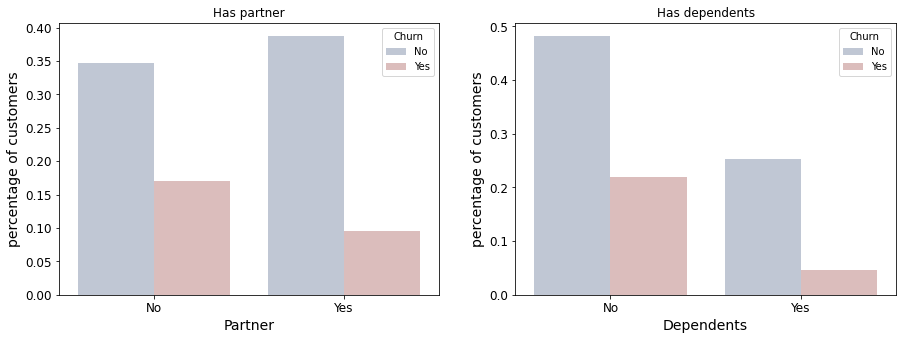

In [37]:
fig, axis = plt.subplots(1, 2, figsize=(15,5))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"

# Partner and Churn
df_2 = df.groupby('Partner')["Churn"].value_counts()/len(df)
df_2 = df_2.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=df_2, ax=axis[0], palette='vlag')

# Dependents and Churn
df_3 = df.groupby('Dependents')["Churn"].value_counts()/len(df)
df_3 = df_3.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=df_3, ax=axis[1], palette='vlag')

Pelanggan yang tidak memiliki tanggungan memiliki tingkat churn yang lebih tinggi daripada pelanggan yang memiliki tanggungan. Sekarang kita dapat mengasumsikan bahwa sebagian besar pelanggan yang membagikan langganan mereka dengan keluarga atau pasangan lebih mungkin untuk bertahan.

### 5. Contract

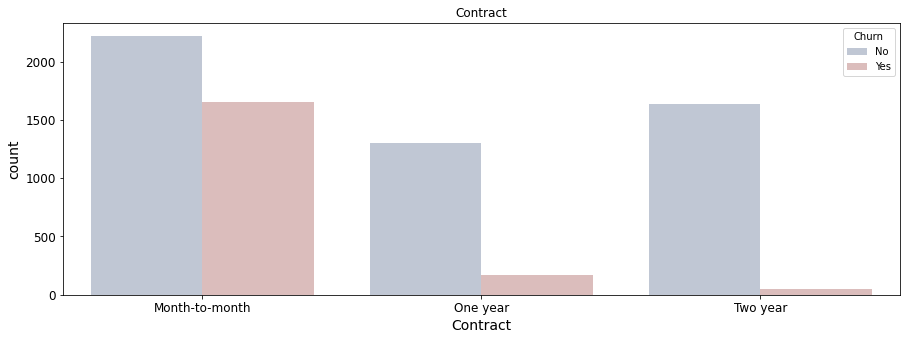

In [51]:
# Graph
plt.figure(figsize=(15,5))
plt.title("Contract")
sns.countplot(data=df, x='Contract', hue='Churn', palette = 'vlag')
plt.show()

Sebagian besar pelanggan memiliki kontrak jangka pendek dengan layanan, dan pelanggan ini cenderung churn dibandingkan dengan pelanggan dengan kontrak jangka panjang.

### 6. Product Service signed up by Customer

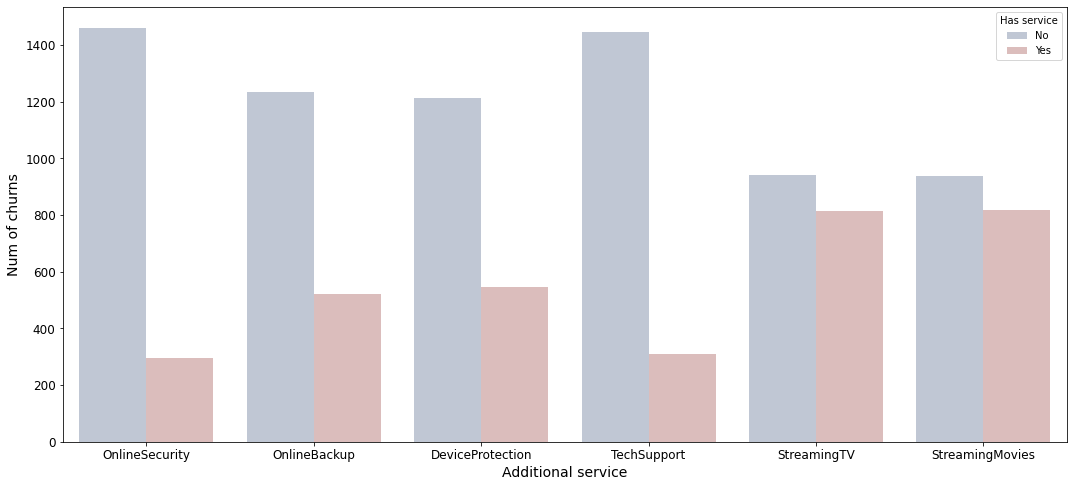

In [53]:
prod = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(18, 8))
df_3 = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df_3 = pd.melt(df_3[prod]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df_3, x='variable', hue='Has service', hue_order=['No', 'Yes'], palette='vlag')
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

Dari plot diatas kita bisa simpulkan:
- Pelanggan yang mendaftar untuk *online security*, *online backup*, *device protection* and *tech support services* memiliki tingkat churn yang rendah.

- Sekitar setengah dari pelanggan dengan *streaming TV*, dan *streaming Film* lebih cenderung berhenti. Oleh karena itu, kedua layanan tersebut tidak dapat diprediksi untuk churn

### 7. Tenure, Monthly Charges, and Total Charges

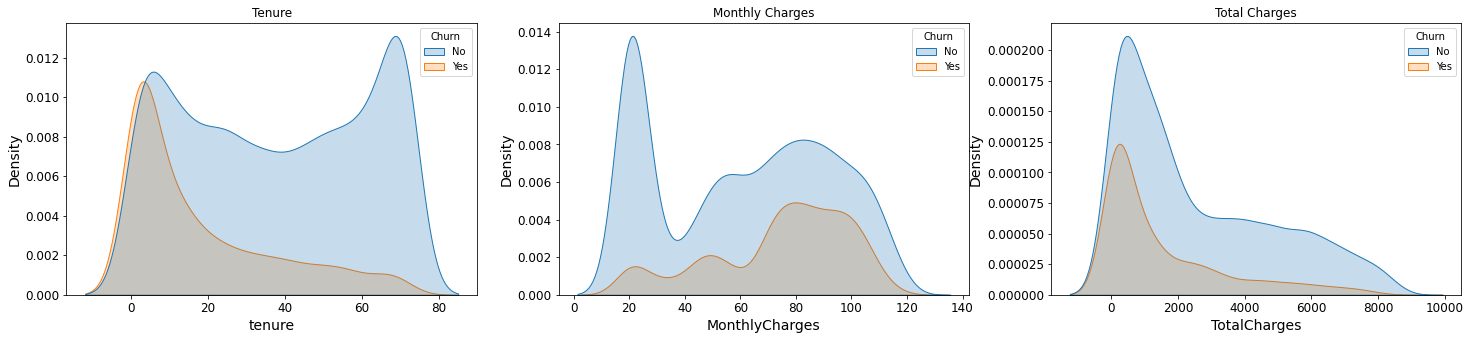

In [45]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.title('Tenure')
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True)

plt.subplot(1,3,2)
plt.title('Monthly Charges')
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True)

plt.subplot(1,3,3)
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True)
plt.title('Total Charges')
plt.show()

- Jika kita melihat berapa lama pelanggan telah menggunakan layanan, pelanggan lama lebih loyal daripada pelanggan baru.
- Dan jika kita melihat tagihan bulanan dan total, pelanggan dengan tagihan bulanan dan total rendah sebagian besar loyal. 
- Tapi, banyak pelanggan dengan tagihan bulanan yang tinggi bergejolak.

### DATA PRE-PROCESSING
Langkah pertama yaitu kita akan membuat piplines.

#### Pipelines

In [77]:
# Numercial
num_pipe = Pipeline(steps=[
            ('scale', StandardScaler())])

# Categorical
cat_pipe = Pipeline(steps=[
            ('le', LabelEncoder()),
            ('ohe', OneHotEncoder())])

#### Encoding Target

In [78]:
df['Churn'] = cat_pipe.named_steps['le'].fit_transform(df['Churn'])

In [79]:
df.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

- 0 untuk tidak Churn (bertahan)
- 1 untuk Churn (berhenti)

#### Define X and y

In [80]:
# Separate features and target
X = df.drop(['Churn'], axis=1)
y = df['Churn']

#### Encoding Features

In [84]:
# Numerical
num = ["tenure", 'MonthlyCharges', 'TotalCharges']

# One-Hot Encoding
cat_ohe =['PaymentMethod', 'Contract', 'InternetService'] 

# Label Encoding
cat_le = list(set(X.columns)- set(num) - set(cat_ohe))

In [86]:
# Label Encoder
for col in cat_le:
    X[col] = cat_pipe.named_steps['le'].fit_transform(X[col])

In [90]:
# One Hote Encoder
ohe = cat_pipe.named_steps['ohe'].fit_transform(X[cat_ohe])

# Array
ohe = ohe.toarray()

# Make a dataframe
a = cat_pipe.named_steps['ohe'].get_feature_names()
ohe_cat = pd.DataFrame(ohe, columns=a)

In [93]:
# Merubah dengan data yang baru yaitu dengan ohe_cat
X.drop(columns=cat_ohe, inplace=True)
X.reset_index(inplace=True)
X = pd.concat([X, ohe_cat], axis=1)

#### Data Split

In [94]:
# Split the dat into train data, validation data, and test data
X_train, X_tes, y_train, y_tes = train_test_split(X, y, test_size=0.30, random_state = 42)
X_valid, X_test, y_valid, y_test = train_test_split(X_tes, y_tes, test_size=0.25, random_state=42)

print("Total data train : ", len(X_train))
print("Total data validation :", len(X_valid))
print("Total data test  : ", len(X_test))

Total data train :  4922
Total data validation : 1582
Total data test  :  528


#### Data Scalling

In [95]:
# Scale the data
X_train = num_pipe.named_steps['scale'].fit_transform(X_train)
X_valid = num_pipe.named_steps['scale'].transform(X_valid)
X_test = num_pipe.named_steps['scale'].transform(X_test)

### MODELLING
Pada bagian ini, kita akan mencoba melatih fitur dengan 2 macam model :
1. Sequential API
2. Functional API

### 1. Sequential API

In [107]:
model = keras.Sequential([
      keras.layers.Dense(20, activation='relu', input_shape=(X_train.shape[-1],)),
      keras.layers.Dense(10, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid'),
  ])

In [108]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 20)                580       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


Dalam model Sequential kami mencoba membuat model sederhana yang terdiri dari:

- **Input Layer** yang memiliki 20 node, karena semua fitur input akan digunakan.
- **Dense Layer** yang memiliki 10 node, kami mencoba mengurangi node menjadi setengahnya
- **Output Layer** dengan 1 node, karena kita hanya mengharapkan 1 output

In [99]:
metrics = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      ]

In [100]:
model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

In [101]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
154/154 [==============================] - 2s 6ms/step - loss: 0.5468 - accuracy: 0.7182 - precision: 0.4687 - recall: 0.4518 - auc: 0.7287 - val_loss: 0.4557 - val_accuracy: 0.7863 - val_precision: 0.6299 - val_recall: 0.4965 - val_auc: 0.8153
Epoch 2/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.7930 - precision: 0.6271 - recall: 0.5451 - auc: 0.8313 - val_loss: 0.4397 - val_accuracy: 0.7819 - val_precision: 0.6036 - val_recall: 0.5482 - val_auc: 0.8266
Epoch 3/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.7987 - precision: 0.6311 - recall: 0.5833 - auc: 0.8405 - val_loss: 0.4362 - val_accuracy: 0.7794 - val_precision: 0.5964 - val_recall: 0.5529 - val_auc: 0.8297
Epoch 4/50
154/154 [==============================] - 0s 3ms/step - loss: 0.4175 - accuracy: 0.8021 - precision: 0.6435 - recall: 0.5726 - auc: 0.8455 - val_loss: 0.4342 - val_accuracy: 0.7845 - val_precision: 0.6094 - val_recall: 0

Epoch 33/50
154/154 [==============================] - 0s 3ms/step - loss: 0.3786 - accuracy: 0.8226 - precision: 0.6951 - recall: 0.5925 - auc: 0.8766 - val_loss: 0.4342 - val_accuracy: 0.7908 - val_precision: 0.6526 - val_recall: 0.4729 - val_auc: 0.8327
Epoch 34/50
154/154 [==============================] - 0s 3ms/step - loss: 0.3785 - accuracy: 0.8228 - precision: 0.7019 - recall: 0.5795 - auc: 0.8767 - val_loss: 0.4355 - val_accuracy: 0.7901 - val_precision: 0.6202 - val_recall: 0.5647 - val_auc: 0.8349
Epoch 35/50
154/154 [==============================] - 0s 3ms/step - loss: 0.3775 - accuracy: 0.8234 - precision: 0.6986 - recall: 0.5902 - auc: 0.8776 - val_loss: 0.4352 - val_accuracy: 0.7889 - val_precision: 0.6319 - val_recall: 0.5129 - val_auc: 0.8324
Epoch 36/50
154/154 [==============================] - 0s 3ms/step - loss: 0.3768 - accuracy: 0.8249 - precision: 0.7046 - recall: 0.5872 - auc: 0.8781 - val_loss: 0.4357 - val_accuracy: 0.7939 - val_precision: 0.6427 - val_recal

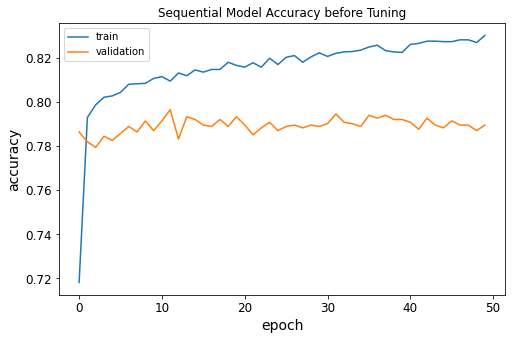

In [118]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Sequential Model Accuracy before Tuning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

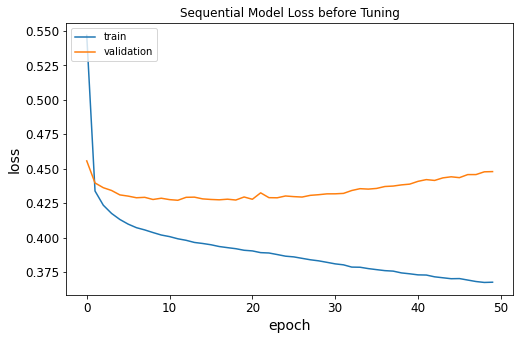

In [119]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Sequential Model Loss before Tuning')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

###### Sequential Model
Dari kedua graph diatas kita bisa simpulkan :
- Untuk data train dan validasi memiliki akurasi yang sama dari sekitar 23 - 50 epoch.
- Untuk grafik loss dapat dilihat bahwa untuk data train mengalami penurunan sedangkn dengan validasi data konstant bahkan sedikit meningkat.

### 2. Functional API

In [105]:
input1 = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(20, activation="relu")(input1)
concat = keras.layers.concatenate([input1, hidden1])
hidden2 = keras.layers.Dense(30, activation="relu")(concat)
output = keras.layers.Dense(1, activation='sigmoid')(hidden2)
model2 = keras.models.Model(inputs=[input1], outputs=[output])

In [106]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 28)]         0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 20)           580         input_3[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 48)           0           input_3[0][0]                    
                                                                 dense_7[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           1470        concatenate_1[0][0]        

Dalam model Functional kami mencoba membuat model sederhana yang terdiri dari:

- **Input Layer** yang memiliki 28 node, karena semua fitur input akan digunakan.
- **Dense Layer** yang memiliki 20 node, kami mencoba mengurangi node menjadi setengahnya
- **Concatenate** yang menggabungkan input dan dense layer yang pertama.
- **Output Layer** dengan 1 node, karena kita hanya mengharapkan 1 output

In [109]:
model2.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

In [110]:
history2 = model2.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
154/154 [==============================] - 2s 6ms/step - loss: 0.4943 - accuracy: 0.7589 - precision: 0.5604 - recall: 0.4420 - auc: 0.7780 - val_loss: 0.4463 - val_accuracy: 0.7794 - val_precision: 0.5868 - val_recall: 0.6047 - val_auc: 0.8223
Epoch 2/50
154/154 [==============================] - 0s 3ms/step - loss: 0.4239 - accuracy: 0.7966 - precision: 0.6300 - recall: 0.5688 - auc: 0.8387 - val_loss: 0.4356 - val_accuracy: 0.7863 - val_precision: 0.6118 - val_recall: 0.5600 - val_auc: 0.8301
Epoch 3/50
154/154 [==============================] - 1s 5ms/step - loss: 0.4141 - accuracy: 0.8060 - precision: 0.6612 - recall: 0.5535 - auc: 0.8467 - val_loss: 0.4310 - val_accuracy: 0.7933 - val_precision: 0.6269 - val_recall: 0.5694 - val_auc: 0.8348
Epoch 4/50
154/154 [==============================] - 0s 3ms/step - loss: 0.4081 - accuracy: 0.8050 - precision: 0.6548 - recall: 0.5627 - auc: 0.8518 - val_loss: 0.4287 - val_accuracy: 0.7939 - val_precision: 0.6313 - val_recall: 0

Epoch 33/50
154/154 [==============================] - 0s 3ms/step - loss: 0.3398 - accuracy: 0.8462 - precision: 0.7406 - recall: 0.6483 - auc: 0.9039 - val_loss: 0.4617 - val_accuracy: 0.7857 - val_precision: 0.6150 - val_recall: 0.5412 - val_auc: 0.8250
Epoch 34/50
154/154 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.8434 - precision: 0.7341 - recall: 0.6437 - auc: 0.9039 - val_loss: 0.4624 - val_accuracy: 0.7762 - val_precision: 0.5885 - val_recall: 0.5553 - val_auc: 0.8210
Epoch 35/50
154/154 [==============================] - 0s 3ms/step - loss: 0.3368 - accuracy: 0.8423 - precision: 0.7313 - recall: 0.6430 - auc: 0.9055 - val_loss: 0.4669 - val_accuracy: 0.7857 - val_precision: 0.6108 - val_recall: 0.5576 - val_auc: 0.8191
Epoch 36/50
154/154 [==============================] - 0s 3ms/step - loss: 0.3366 - accuracy: 0.8448 - precision: 0.7309 - recall: 0.6583 - auc: 0.9058 - val_loss: 0.4679 - val_accuracy: 0.7819 - val_precision: 0.6124 - val_recal

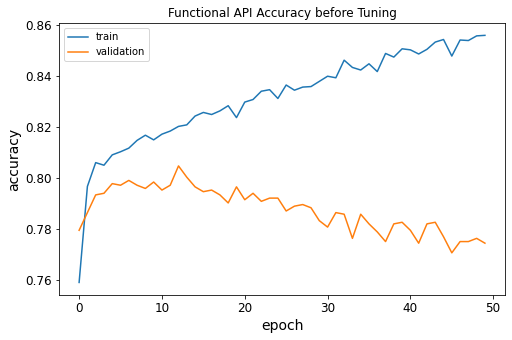

In [124]:
plt.figure(figsize=(8,5))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Functional API Accuracy before Tuning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

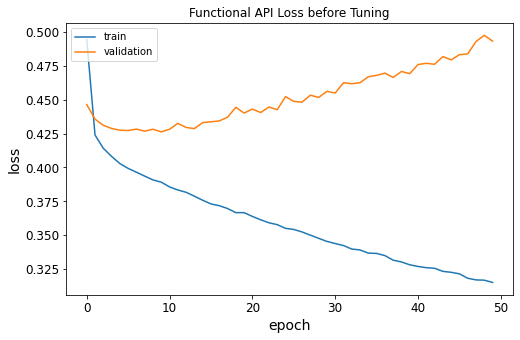

In [125]:
plt.figure(figsize=(8, 5))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Functional API Loss before Tuning')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

###### Functional API
Dari kedua graph diatas kita bisa simpulkan :
- Untuk data train terlihat adanya kenaikan setiap epochnya, sedangkan dengan data validasi mengalami penurunan nilai akurasi
- Untuk grafik loss dapat dilihat bahwa untuk data train mengalami penurunan sedangkn dengan data validasi mengalami kenaikan setiap epochnya

### MODEL IMPROVEMENT

### Hyperparameter Tuning
### 1. Sequential Model

In [129]:
def create (optimizer='adam', init='he_normal'):
  model = keras.Sequential([
      keras.layers.Dense(20, activation='relu', input_shape=(X_train.shape[-1],)),
      keras.layers.Dense(10, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid'),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)
  
  return model

In [148]:
# Create sklearn model for network
model_init_batch_epoch_CV = KerasClassifier(build_fn=create, verbose=1)

# Define hyperparameter
init_mode = ['he_normal', 'he_uniform']
batches = [128, 256]
epochs = [20, 30, 50]

param_grid = dict(epochs=epochs, batch_size=batches, init=init_mode)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, param_grid=param_grid, cv=3)

grid_result=grid.fit(X_train, y_train)

Epoch 1/20
26/26 [==============================] - 1s 3ms/step - loss: 0.5565 - accuracy: 0.7329 - precision: 0.5000 - recall: 0.3079 - auc: 0.7350
Epoch 2/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7382 - precision: 0.5366 - recall: 0.1259 - auc: 0.7666
Epoch 3/20
26/26 [==============================] - 0s 3ms/step - loss: 0.4698 - accuracy: 0.7434 - precision: 0.5755 - recall: 0.1396 - auc: 0.7963
Epoch 4/20
26/26 [==============================] - 0s 3ms/step - loss: 0.4558 - accuracy: 0.7534 - precision: 0.6148 - recall: 0.1991 - auc: 0.8121
Epoch 5/20
26/26 [==============================] - 0s 3ms/step - loss: 0.4463 - accuracy: 0.7644 - precision: 0.6455 - recall: 0.2563 - auc: 0.8217
Epoch 6/20
26/26 [==============================] - 0s 3ms/step - loss: 0.4392 - accuracy: 0.7681 - precision: 0.6226 - recall: 0.3284 - auc: 0.8278
Epoch 7/20
26/26 [==============================] - 0s 3ms/step - loss: 0.4331 - accuracy: 0.7796 - precis

26/26 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.7864 - precision: 0.6226 - recall: 0.4525 - auc: 0.8110
Epoch 6/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.7888 - precision: 0.6223 - recall: 0.4771 - auc: 0.8186
Epoch 7/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.7919 - precision: 0.6312 - recall: 0.4795 - auc: 0.8244
Epoch 8/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.7943 - precision: 0.6297 - recall: 0.5064 - auc: 0.8292
Epoch 9/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.7977 - precision: 0.6360 - recall: 0.5182 - auc: 0.8332
Epoch 10/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8004 - precision: 0.6375 - recall: 0.5381 - auc: 0.8366
Epoch 11/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.7992 - precision: 0.63

Epoch 8/30
26/26 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8059 - precision: 0.6595 - recall: 0.5861 - auc: 0.8465
Epoch 9/30
26/26 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8077 - precision: 0.6658 - recall: 0.5827 - auc: 0.8496
Epoch 10/30
26/26 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8086 - precision: 0.6617 - recall: 0.6007 - auc: 0.8531
Epoch 11/30
26/26 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8092 - precision: 0.6662 - recall: 0.5928 - auc: 0.8557
Epoch 12/30
26/26 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8107 - precision: 0.6705 - recall: 0.5928 - auc: 0.8581
Epoch 13/30
26/26 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8110 - precision: 0.6727 - recall: 0.5894 - auc: 0.8598
Epoch 14/30
26/26 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8150 - p

26/26 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8214 - precision: 0.6891 - recall: 0.6209 - auc: 0.8718
Epoch 24/30
26/26 [==============================] - 0s 3ms/step - loss: 0.3875 - accuracy: 0.8241 - precision: 0.7010 - recall: 0.6119 - auc: 0.8726
Epoch 25/30
26/26 [==============================] - 0s 3ms/step - loss: 0.3866 - accuracy: 0.8211 - precision: 0.6860 - recall: 0.6265 - auc: 0.8730
Epoch 26/30
26/26 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8214 - precision: 0.6925 - recall: 0.6130 - auc: 0.8741
Epoch 27/30
26/26 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8235 - precision: 0.6997 - recall: 0.6108 - auc: 0.8750
Epoch 28/30
26/26 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8229 - precision: 0.6911 - recall: 0.6265 - auc: 0.8755
Epoch 29/30
26/26 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8251 - precision: 

Epoch 16/50
26/26 [==============================] - 0s 4ms/step - loss: 0.4075 - accuracy: 0.8062 - precision: 0.6608 - recall: 0.5595 - auc: 0.8538
Epoch 17/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8071 - precision: 0.6600 - recall: 0.5686 - auc: 0.8553
Epoch 18/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8086 - precision: 0.6631 - recall: 0.5721 - auc: 0.8565
Epoch 19/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8068 - precision: 0.6600 - recall: 0.5664 - auc: 0.8579
Epoch 20/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8083 - precision: 0.6614 - recall: 0.5744 - auc: 0.8590
Epoch 21/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8080 - precision: 0.6593 - recall: 0.5778 - auc: 0.8603
Epoch 22/50
26/26 [==============================] - ETA: 0s - loss: 0.3981 - accuracy: 0.8093 - pre

26/26 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8096 - precision: 0.6652 - recall: 0.5381 - auc: 0.8580
Epoch 23/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.8117 - precision: 0.6746 - recall: 0.5322 - auc: 0.8590
Epoch 24/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8123 - precision: 0.6690 - recall: 0.5498 - auc: 0.8604
Epoch 25/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8123 - precision: 0.6730 - recall: 0.5404 - auc: 0.8615
Epoch 26/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8141 - precision: 0.6789 - recall: 0.5404 - auc: 0.8629
Epoch 27/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.8160 - precision: 0.6756 - recall: 0.5615 - auc: 0.8632
Epoch 28/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8129 - precision: 

26/26 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8232 - precision: 0.6934 - recall: 0.6232 - auc: 0.8836
Epoch 29/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8251 - precision: 0.6900 - recall: 0.6434 - auc: 0.8843
Epoch 30/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8244 - precision: 0.6999 - recall: 0.6164 - auc: 0.8853
Epoch 31/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3690 - accuracy: 0.8260 - precision: 0.6963 - recall: 0.6344 - auc: 0.8861
Epoch 32/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3682 - accuracy: 0.8263 - precision: 0.6986 - recall: 0.6310 - auc: 0.8867
Epoch 33/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.8272 - precision: 0.6973 - recall: 0.6400 - auc: 0.8872
Epoch 34/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8296 - precision: 

Epoch 14/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8104 - precision: 0.6692 - recall: 0.5939 - auc: 0.8555
Epoch 15/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8119 - precision: 0.6722 - recall: 0.5973 - auc: 0.8572
Epoch 16/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4047 - accuracy: 0.8129 - precision: 0.6695 - recall: 0.6108 - auc: 0.8588
Epoch 17/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8132 - precision: 0.6683 - recall: 0.6164 - auc: 0.8600
Epoch 18/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8144 - precision: 0.6728 - recall: 0.6130 - auc: 0.8614
Epoch 19/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8135 - precision: 0.6720 - recall: 0.6085 - auc: 0.8626
Epoch 20/20
7/7 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.7898 - p

13/13 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.7991 - precision: 0.6962 - recall: 0.4589 - auc: 0.8419
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.8007 - precision: 0.6762 - recall: 0.5073 - auc: 0.8461
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.8065 - precision: 0.6749 - recall: 0.5512 - auc: 0.8495
Epoch 9/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8074 - precision: 0.6650 - recall: 0.5827 - auc: 0.8519
Epoch 10/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8071 - precision: 0.6588 - recall: 0.5973 - auc: 0.8542
Epoch 11/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8107 - precision: 0.6658 - recall: 0.6052 - auc: 0.8563
Epoch 12/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8110 - precision: 0.6

13/13 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8043 - precision: 0.6495 - recall: 0.5767 - auc: 0.8499
Epoch 20/30
13/13 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8046 - precision: 0.6499 - recall: 0.5778 - auc: 0.8511
Epoch 21/30
13/13 [==============================] - 0s 3ms/step - loss: 0.4101 - accuracy: 0.8055 - precision: 0.6536 - recall: 0.5744 - auc: 0.8525
Epoch 22/30
13/13 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8068 - precision: 0.6562 - recall: 0.5767 - auc: 0.8536
Epoch 23/30
13/13 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8074 - precision: 0.6555 - recall: 0.5835 - auc: 0.8545
Epoch 24/30
13/13 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8074 - precision: 0.6563 - recall: 0.5812 - auc: 0.8557
Epoch 25/30
13/13 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8062 - precision: 

13/13 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.7907 - precision: 0.6281 - recall: 0.4771 - auc: 0.8305
Epoch 13/30
13/13 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.7934 - precision: 0.6352 - recall: 0.4818 - auc: 0.8328
Epoch 14/30
13/13 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.7962 - precision: 0.6407 - recall: 0.4912 - auc: 0.8347
Epoch 15/30
13/13 [==============================] - 0s 3ms/step - loss: 0.4226 - accuracy: 0.7986 - precision: 0.6437 - recall: 0.5041 - auc: 0.8366
Epoch 16/30
13/13 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.7992 - precision: 0.6418 - recall: 0.5147 - auc: 0.8383
Epoch 17/30
13/13 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8013 - precision: 0.6502 - recall: 0.5100 - auc: 0.8400
Epoch 18/30
13/13 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8004 - precision: 

Epoch 5/30
13/13 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.7873 - precision: 0.6702 - recall: 0.4229 - auc: 0.7969
Epoch 6/30
13/13 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7918 - precision: 0.6667 - recall: 0.4634 - auc: 0.8141
Epoch 7/30
13/13 [==============================] - 0s 2ms/step - loss: 0.4513 - accuracy: 0.7973 - precision: 0.6697 - recall: 0.4972 - auc: 0.8247
Epoch 8/30
13/13 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.8004 - precision: 0.6726 - recall: 0.5129 - auc: 0.8319
Epoch 9/30
13/13 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8013 - precision: 0.6700 - recall: 0.5253 - auc: 0.8380
Epoch 10/30
13/13 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8052 - precision: 0.6727 - recall: 0.5478 - auc: 0.8422
Epoch 11/30
13/13 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.8089 - prec

7/7 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.7971 - precision: 0.6347 - recall: 0.5484 - auc: 0.8383
Epoch 1/50
13/13 [==============================] - 1s 2ms/step - loss: 0.6032 - accuracy: 0.7265 - precision: 0.4808 - recall: 0.2177 - auc: 0.6752
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.7181 - precision: 0.3676 - recall: 0.0562 - auc: 0.6752
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.7294 - precision: 0.5032 - recall: 0.0877 - auc: 0.7503
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.7382 - precision: 0.5670 - recall: 0.1429 - auc: 0.7903
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.7595 - precision: 0.6344 - recall: 0.2655 - auc: 0.8128
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.7720 - precision: 0.6364 -

13/13 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.7848 - precision: 0.6414 - recall: 0.4359 - auc: 0.7924
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4594 - accuracy: 0.7873 - precision: 0.6424 - recall: 0.4542 - auc: 0.8092
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.7906 - precision: 0.6454 - recall: 0.4748 - auc: 0.8190
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.7949 - precision: 0.6511 - recall: 0.4954 - auc: 0.8257
Epoch 10/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.7979 - precision: 0.6554 - recall: 0.5092 - auc: 0.8309
Epoch 11/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.7995 - precision: 0.6561 - recall: 0.5195 - auc: 0.8344
Epoch 12/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8004 - precision: 0.6

13/13 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.7892 - precision: 0.6222 - recall: 0.4807 - auc: 0.8215
Epoch 13/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4352 - accuracy: 0.7919 - precision: 0.6272 - recall: 0.4912 - auc: 0.8247
Epoch 14/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4319 - accuracy: 0.7913 - precision: 0.6265 - recall: 0.4877 - auc: 0.8278
Epoch 15/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.7919 - precision: 0.6265 - recall: 0.4936 - auc: 0.8305
Epoch 16/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.7934 - precision: 0.6296 - recall: 0.4982 - auc: 0.8328
Epoch 17/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.7946 - precision: 0.6326 - recall: 0.5006 - auc: 0.8352
Epoch 18/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.7971 - precision: 

In [149]:
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')

Best Accuracy for 0.7991 using {'batch_size': 128, 'epochs': 20, 'init': 'he_uniform'}


**Sequential Model**

Parameter terbaik untuk model sequential :

- Batch size : 128
- Epochs : 50
- Kernel initializer : he_uniform

Maka selanjutnya kita akan mencobanya kembali dengan parameter terbaik.

In [150]:
seq = keras.Sequential([
      keras.layers.Dense(20, activation='relu', input_shape=(X_train.shape[-1],), kernel_initializer='he_uniform'),
      keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform'),
      keras.layers.Dense(1, activation='sigmoid', kernel_initializer='he_uniform'),
  ])

seq.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

In [151]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 20)                580       
_________________________________________________________________
dense_95 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 11        
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [159]:
history_seq = seq.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/50
39/39 [==============================] - 0s 4ms/step - loss: 0.3618 - accuracy: 0.8277 - precision: 0.7025 - recall: 0.6101 - auc: 0.8887 - val_loss: 0.4543 - val_accuracy: 0.7832 - val_precision: 0.6079 - val_recall: 0.5435 - val_auc: 0.8211
Epoch 2/50
39/39 [==============================] - 0s 3ms/step - loss: 0.3611 - accuracy: 0.8269 - precision: 0.6942 - recall: 0.6231 - auc: 0.8891 - val_loss: 0.4548 - val_accuracy: 0.7826 - val_precision: 0.6086 - val_recall: 0.5341 - val_auc: 0.8221
Epoch 3/50
39/39 [==============================] - 0s 3ms/step - loss: 0.3606 - accuracy: 0.8295 - precision: 0.7027 - recall: 0.6216 - auc: 0.8893 - val_loss: 0.4557 - val_accuracy: 0.7851 - val_precision: 0.6152 - val_recall: 0.5341 - val_auc: 0.8202
Epoch 4/50
39/39 [==============================] - 0s 4ms/step - loss: 0.3606 - accuracy: 0.8275 - precision: 0.6973 - recall: 0.6200 - auc: 0.8896 - val_loss: 0.4577 - val_accuracy: 0.7838 - val_precision: 0.6137 - val_recall: 0.5271 - 

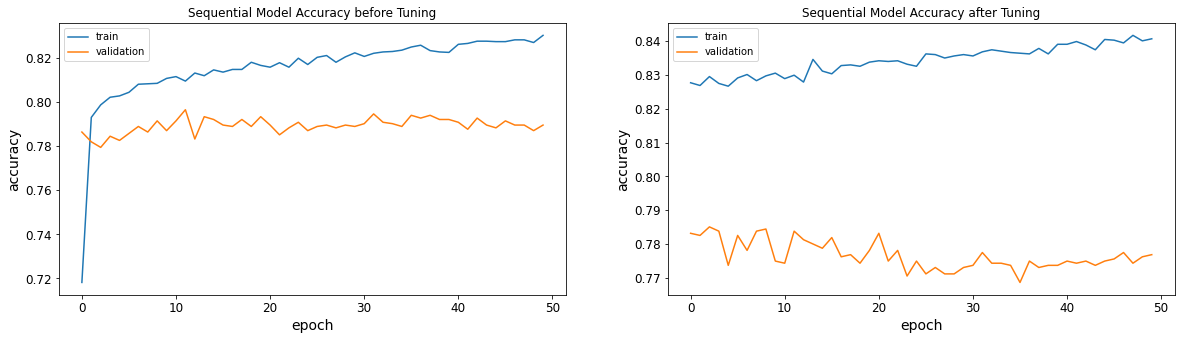

In [160]:
# Before Tuning
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Sequential Model Accuracy before Tuning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# After Tuning
plt.subplot(1,2,2)
plt.plot(history_seq.history['accuracy'])
plt.plot(history_seq.history['val_accuracy'])
plt.title('Sequential Model Accuracy after Tuning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

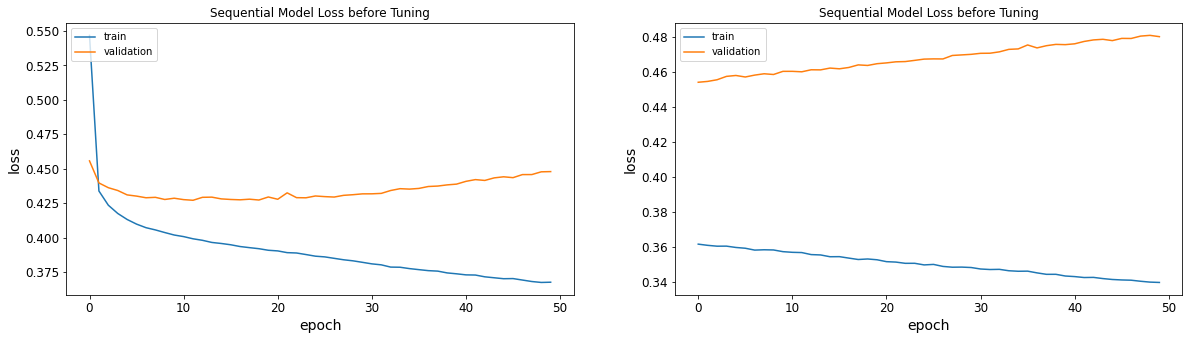

In [161]:
# Before Tuning
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Sequential Model Loss before Tuning')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# After Tuning
plt.subplot(1,2,2)
plt.plot(history_seq.history['loss'])
plt.plot(history_seq.history['val_loss'])
plt.title('Sequential Model Loss before Tuning')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Setelah dibandingkan sebelum dan sesudah tuning :
- Untuk nilai akurasi sebelum tuning **83%** dan setelah tuning **84%**,
- Dengan nilai AUC yang meningkat dari **88%** ke **90%**,
- Dan nilai loss yang berkurang dari **36%** ke **33%**.

### 2. Functional Model

In [173]:
def create2(optimizer='adam'):
  input1 = keras.layers.Input(shape=X_train.shape[1:],)
  hidden1 = keras.layers.Dense(20, activation="relu")(input1)
  concat = keras.layers.concatenate([input1, hidden1])
  hidden2 = keras.layers.Dense(30, activation="relu")(concat)
  output = keras.layers.Dense(1, activation='sigmoid')(hidden2)
  model = keras.models.Model(inputs=[input1], outputs=[output])
  
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)
  
  return model

In [174]:
# Create sklearn model for network
model_func_batch_epoch_CV = KerasClassifier(build_fn=create2, verbose=1)

# Define hyperparameter
batches = [64, 128, 256]
epochs = [20, 30, 50]

param_grid = dict(epochs=epochs, batch_size=batches)
grid = GridSearchCV(estimator=model_func_batch_epoch_CV, param_grid=param_grid, cv=3)

grid_result=grid.fit(X_train, y_train)

Epoch 1/20
52/52 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.7328 - precision: 0.4982 - recall: 0.6214 - auc: 0.7800
Epoch 2/20
52/52 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.7687 - precision: 0.5713 - recall: 0.5275 - auc: 0.8073
Epoch 3/20
52/52 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.7921 - precision: 0.6308 - recall: 0.5297 - auc: 0.8301
Epoch 4/20
52/52 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.7998 - precision: 0.6472 - recall: 0.5458 - auc: 0.8414
Epoch 5/20
52/52 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8025 - precision: 0.6449 - recall: 0.5755 - auc: 0.8484
Epoch 6/20
52/52 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8049 - precision: 0.6577 - recall: 0.5584 - auc: 0.8538
Epoch 7/20
52/52 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8059 - precis

Epoch 16/30
52/52 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8272 - precision: 0.7147 - recall: 0.6029 - auc: 0.8841
Epoch 17/30
52/52 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8247 - precision: 0.7034 - recall: 0.6108 - auc: 0.8850
Epoch 18/30
52/52 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8278 - precision: 0.7061 - recall: 0.6243 - auc: 0.8873
Epoch 19/30
52/52 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.8275 - precision: 0.7168 - recall: 0.6007 - auc: 0.8879
Epoch 20/30
52/52 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8290 - precision: 0.7135 - recall: 0.6164 - auc: 0.8900
Epoch 21/30
52/52 [==============================] - 0s 2ms/step - loss: 0.3627 - accuracy: 0.8302 - precision: 0.7139 - recall: 0.6232 - auc: 0.8905
Epoch 22/30
52/52 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.8281 -

52/52 [==============================] - 0s 2ms/step - loss: 0.3824 - accuracy: 0.8202 - precision: 0.6834 - recall: 0.6265 - auc: 0.8765
Epoch 12/50
52/52 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8211 - precision: 0.6976 - recall: 0.5996 - auc: 0.8777
Epoch 13/50
52/52 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8220 - precision: 0.6988 - recall: 0.6029 - auc: 0.8797
Epoch 14/50
52/52 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.8202 - precision: 0.6876 - recall: 0.6164 - auc: 0.8817
Epoch 15/50
52/52 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8241 - precision: 0.7021 - recall: 0.6097 - auc: 0.8828
Epoch 16/50
52/52 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.8223 - precision: 0.6962 - recall: 0.6108 - auc: 0.8847
Epoch 17/50
52/52 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.8220 - precision: 

26/26 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8171 - precision: 0.6908 - recall: 0.5675 - auc: 0.8760
Epoch 18/20
26/26 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.8171 - precision: 0.6798 - recall: 0.5927 - auc: 0.8772
Epoch 19/20
26/26 [==============================] - 0s 2ms/step - loss: 0.3767 - accuracy: 0.8226 - precision: 0.6973 - recall: 0.5904 - auc: 0.8785
Epoch 20/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.7995 - precision: 0.6540 - recall: 0.5138 - auc: 0.8412
Epoch 1/20
26/26 [==============================] - 1s 2ms/step - loss: 0.5926 - accuracy: 0.7172 - precision: 0.4778 - recall: 0.5601 - auc: 0.7444
Epoch 2/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4609 - accuracy: 0.7781 - precision: 0.6158 - recall: 0.4814 - auc: 0.8075
Epoch 3/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.7940 - precision: 0.6

26/26 [==============================] - 1s 2ms/step - loss: 0.6287 - accuracy: 0.6951 - precision: 0.4399 - recall: 0.6588 - auc: 0.7504
Epoch 2/30
26/26 [==============================] - 0s 2ms/step - loss: 0.4733 - accuracy: 0.7629 - precision: 0.5519 - recall: 0.4678 - auc: 0.7922
Epoch 3/30
26/26 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.7806 - precision: 0.6018 - recall: 0.4607 - auc: 0.8179
Epoch 4/30
26/26 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.7858 - precision: 0.6022 - recall: 0.5182 - auc: 0.8295
Epoch 5/30
26/26 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.7925 - precision: 0.6218 - recall: 0.5147 - auc: 0.8352
Epoch 6/30
26/26 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.7971 - precision: 0.6385 - recall: 0.5053 - auc: 0.8392
Epoch 7/30
26/26 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.7980 - precision: 0.6301

26/26 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8308 - precision: 0.7215 - recall: 0.6119 - auc: 0.8935
Epoch 28/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8357 - precision: 0.7232 - recall: 0.6378 - auc: 0.8948
Epoch 29/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8354 - precision: 0.7281 - recall: 0.6265 - auc: 0.8958
Epoch 30/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.8348 - precision: 0.7268 - recall: 0.6254 - auc: 0.8968
Epoch 31/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.8342 - precision: 0.7297 - recall: 0.6164 - auc: 0.8976
Epoch 32/50
26/26 [==============================] - 0s 3ms/step - loss: 0.3516 - accuracy: 0.8336 - precision: 0.7260 - recall: 0.6198 - auc: 0.8983
Epoch 33/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3501 - accuracy: 0.8388 - precision: 

Epoch 13/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 0.8168 - precision: 0.6860 - recall: 0.5973 - auc: 0.8624
Epoch 14/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3983 - accuracy: 0.8180 - precision: 0.6834 - recall: 0.6119 - auc: 0.8636
Epoch 15/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8205 - precision: 0.6904 - recall: 0.6119 - auc: 0.8653
Epoch 16/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3948 - accuracy: 0.8220 - precision: 0.6958 - recall: 0.6097 - auc: 0.8665
Epoch 17/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8220 - precision: 0.6953 - recall: 0.6108 - auc: 0.8678
Epoch 18/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3916 - accuracy: 0.8217 - precision: 0.6964 - recall: 0.6063 - auc: 0.8691
Epoch 19/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.8223 -

13/13 [==============================] - 0s 3ms/step - loss: 0.4071 - accuracy: 0.8074 - precision: 0.6559 - recall: 0.5451 - auc: 0.8506
Epoch 19/30
13/13 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8090 - precision: 0.6583 - recall: 0.5510 - auc: 0.8521
Epoch 20/30
13/13 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8096 - precision: 0.6597 - recall: 0.5522 - auc: 0.8533
Epoch 21/30
13/13 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8108 - precision: 0.6686 - recall: 0.5393 - auc: 0.8546
Epoch 22/30
13/13 [==============================] - 0s 3ms/step - loss: 0.4013 - accuracy: 0.8093 - precision: 0.6574 - recall: 0.5557 - auc: 0.8555
Epoch 23/30
13/13 [==============================] - 0s 3ms/step - loss: 0.3995 - accuracy: 0.8111 - precision: 0.6701 - recall: 0.5381 - auc: 0.8569
Epoch 24/30
13/13 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8138 - precision: 

13/13 [==============================] - 0s 3ms/step - loss: 0.3593 - accuracy: 0.8397 - precision: 0.7366 - recall: 0.6355 - auc: 0.8933
Epoch 45/50
13/13 [==============================] - 0s 3ms/step - loss: 0.3584 - accuracy: 0.8391 - precision: 0.7282 - recall: 0.6479 - auc: 0.8938
Epoch 46/50
13/13 [==============================] - 0s 3ms/step - loss: 0.3571 - accuracy: 0.8403 - precision: 0.7392 - recall: 0.6344 - auc: 0.8946
Epoch 47/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3564 - accuracy: 0.8403 - precision: 0.7367 - recall: 0.6389 - auc: 0.8950
Epoch 48/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.8397 - precision: 0.7289 - recall: 0.6502 - auc: 0.8957
Epoch 49/50
13/13 [==============================] - 0s 3ms/step - loss: 0.3547 - accuracy: 0.8397 - precision: 0.7379 - recall: 0.6333 - auc: 0.8964
Epoch 50/50
7/7 [==============================] - 1s 2ms/step - loss: 0.4455 - accuracy: 0.7818 - precision: 0.

In [175]:
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')

Best Accuracy for 0.8007 using {'batch_size': 256, 'epochs': 20}


**Functional Model**

Parameter terbaik untuk model functional  :

- Batch size : 256
- Epochs : 50

Maka selanjutnya kita akan mencobanya kembali dengan parameter terbaik.

In [176]:
input1 = keras.layers.Input(shape=X_train.shape[1:],)
hidden1 = keras.layers.Dense(20, activation="relu")(input1)
concat = keras.layers.concatenate([input1, hidden1])
hidden2 = keras.layers.Dense(30, activation="relu")(concat)
output = keras.layers.Dense(1, activation='sigmoid')(hidden2)
func = keras.models.Model(inputs=[input1], outputs=[output])

In [177]:
func.summary()

Model: "model_31"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_89 (InputLayer)           [(None, 28)]         0                                            
__________________________________________________________________________________________________
dense_438 (Dense)               (None, 20)           580         input_89[0][0]                   
__________________________________________________________________________________________________
concatenate_31 (Concatenate)    (None, 48)           0           input_89[0][0]                   
                                                                 dense_438[0][0]                  
__________________________________________________________________________________________________
dense_439 (Dense)               (None, 30)           1470        concatenate_31[0][0]      

In [178]:
func.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

In [184]:
history_func = func.fit(X_train, y_train, epochs=50, batch_size=256, validation_data=(X_valid, y_valid))

Epoch 1/50
20/20 [==============================] - 0s 5ms/step - loss: 0.3211 - accuracy: 0.8488 - precision: 0.7487 - recall: 0.6491 - auc: 0.9167 - val_loss: 0.4724 - val_accuracy: 0.7819 - val_precision: 0.6005 - val_recall: 0.5624 - val_auc: 0.8171
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 0.3199 - accuracy: 0.8533 - precision: 0.7522 - recall: 0.6682 - auc: 0.9177 - val_loss: 0.4716 - val_accuracy: 0.7863 - val_precision: 0.6225 - val_recall: 0.5200 - val_auc: 0.8152
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3193 - accuracy: 0.8557 - precision: 0.7569 - recall: 0.6735 - auc: 0.9186 - val_loss: 0.4747 - val_accuracy: 0.7851 - val_precision: 0.6197 - val_recall: 0.5176 - val_auc: 0.8129
Epoch 4/50
20/20 [==============================] - 0s 6ms/step - loss: 0.3187 - accuracy: 0.8517 - precision: 0.7553 - recall: 0.6537 - auc: 0.9183 - val_loss: 0.4745 - val_accuracy: 0.7794 - val_precision: 0.5974 - val_recall: 0.5482 - 

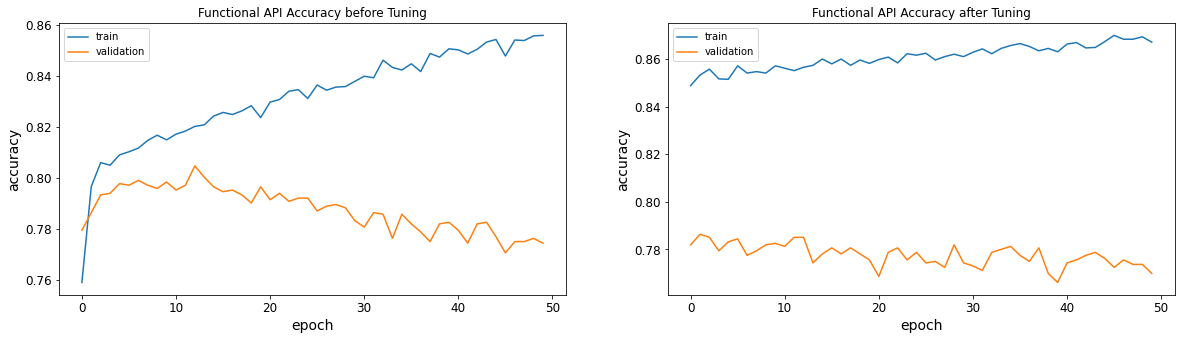

In [185]:
# Before Tuning
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Functional API Accuracy before Tuning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# After Tuning
plt.subplot(1,2,2)
plt.plot(history_func.history['accuracy'])
plt.plot(history_func.history['val_accuracy'])
plt.title('Functional API Accuracy after Tuning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

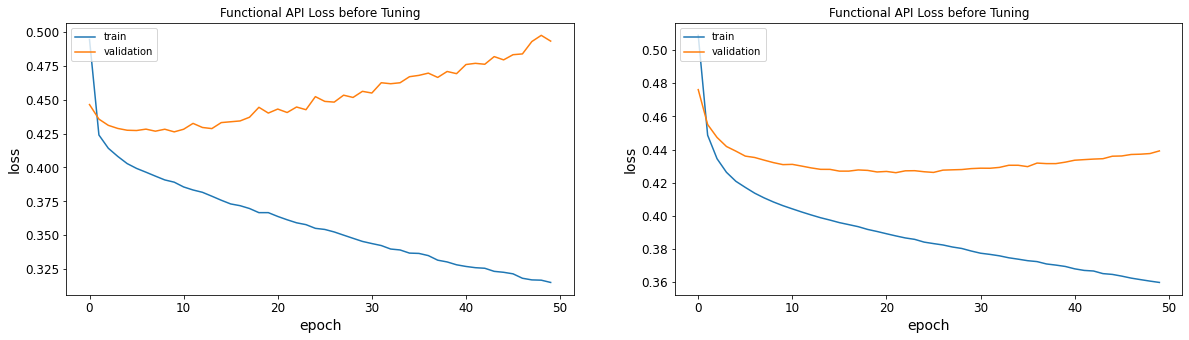

In [182]:
# Before Tuning
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Functional API Loss before Tuning')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# After Tuning
plt.subplot(1,2,2)
plt.plot(history_func.history['loss'])
plt.plot(history_func.history['val_loss'])
plt.title('Functional API Loss before Tuning')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Setelah dibandingkan sebelum dan sesudah tuning :
- Untuk nilai akurasi sebelum tuning **85%** dan setelah tuning **86%**,
- Dengan nilai AUC yang meningkat dari **91%** ke **93%**,
- Dan nilai loss yang berkurang dari **31%** ke **29%**.

#### Kesimpulan

Dari kedua model tersebut dapat kita ambil kesimpulan bahwa model Functional yang paling bagus. Maka selanjutnya kita akan mencobanya dengan data sample.

In [189]:
# Save the model
func.save("func_model.h5")

### MODEL INFERENCE

In [190]:
new = X.sample(2)
new

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,...,x0_Bank transfer (automatic),x0_Credit card (automatic),x0_Electronic check,x0_Mailed check,x1_Month-to-month,x1_One year,x1_Two year,x2_DSL,x2_Fiber optic,x2_No
2476,2481,4678,1,1,1,0,61,1,2,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6773,6784,6710,0,0,0,0,19,1,2,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [191]:
# Load the saved model
best_model = keras.models.load_model("func_model.h5")

In [193]:
# Predict the dummy data
best_model.predict(new).round(0)

array([[0.],
       [0.]], dtype=float32)

Model memprediksi bahwa pelanggan dalam data sample akan stay.

### Kesimpulan

1. EDA
    - Dari seluruh pelanggan yang tercatat di dataset, sekitar 26% di antaranya berhenti menggunakan layanan (churn).
    - Untuk jenis kelamin keduanya memiliki tingkat churn yang sama.
    - Dari seluruh pelanggan, sekitar 16% di antaranya adalah warga lanjut usia. Kebanyakan dari mereka lebih setia dibandingkan dengan yang muda.
    - Sebagian besar pelanggan memiliki kontrak jangka pendek dengan layanan, dan pelanggan ini cenderung churn dibandingkan dengan pelanggan dengan kontrak jangka panjang.
    - Dan jika kita melihat tagihan bulanan dan total, pelanggan dengan tagihan bulanan dan total rendah sebagian besar loyal.     
2. Kita memakai 2 model ANN:
   - Sequential API Model
   - Functional API Model
3. Dan setelah setelah melakukan training dengan 2 model berikut didapatkan model yang terbaik untuk memprediksi yaitu **Functional Model**